# 李鲁鲁老师的Python课程 第三课 条件分支与三门问题

In [7]:
import cv2
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
cap = cv2.VideoCapture(0)
while True:
    ret, frame = cap.read()
    if not ret: print("无法捕获视频流"); break
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.1, 4)
    if len(faces) > 0:
        for (x, y, w, h) in faces: cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 0, 255), 2)
        frame[:, :, 1] //= 4; frame[:, :, 0] //= 4
    else:
        frame[:, :, 0] //= 4; frame[:, :, 2] //= 4
    cv2.imshow('Face Detection', frame)
    if cv2.waitKey(1) & 0xFF == ord('q'): break
cap.release()
cv2.destroyAllWindows()


在研究古典概率的时候，很多过往的数学家都会投掷大量次数的骰子

来验证特定随机事件的出现概率

显然，当我们有了计算机之后，做这样的概率模拟就容易多了

```
我希望用最简单的python程序

来模拟三颗骰子的投掷 5000次，并给出骰子和为不同数字时

出现的概率分布，并最后用条形图来可视化
```

c:\Program Files\Python38\lib\site-packages\IPython\core\pylabtools.py:137: UserWarning: Glyph 27010 (\N{CJK UNIFIED IDEOGRAPH-6982}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Program Files\Python38\lib\site-packages\IPython\core\pylabtools.py:137: UserWarning: Glyph 29575 (\N{CJK UNIFIED IDEOGRAPH-7387}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Program Files\Python38\lib\site-packages\IPython\core\pylabtools.py:137: UserWarning: Glyph 19977 (\N{CJK UNIFIED IDEOGRAPH-4E09}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Program Files\Python38\lib\site-packages\IPython\core\pylabtools.py:137: UserWarning: Glyph 39063 (\N{CJK UNIFIED IDEOGRAPH-9897}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Program Files\Python38\lib\site-packages\IPython\core\pylabtools.py:137: UserWarning: Glyph 39600 (\N{CJK UNIFIED IDEOGRAPH-9AB0}) missing from current font.
  fig.canvas.print_figure(b

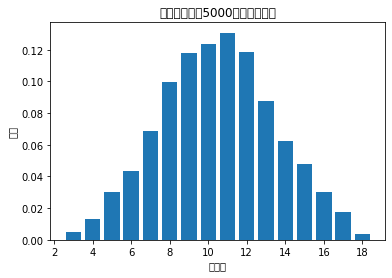

In [1]:
import random
import matplotlib.pyplot as plt

# 投掷三颗骰子5000次
results = [sum([random.randint(1, 6) for _ in range(3)]) for _ in range(5000)]

# 计算每个和的出现次数
sum_counts = {i: results.count(i) for i in range(3, 19)}

# 计算概率分布
total_rolls = 5000
probability_distribution = {sum_: count / total_rolls for sum_, count in sum_counts.items()}

# 绘制条形图
plt.bar(probability_distribution.keys(), probability_distribution.values())
plt.xlabel('骰子和')
plt.ylabel('概率')
plt.title('三颗骰子投掷5000次的概率分布')
plt.show()


### 课堂练习

- 让ChatGPT帮忙修复中文显示的问题

## 三门问题

我们有时候会听到一个经典的“三门问题”，在电视节目中，经常会出现抽奖环节。三个门后面有一个是奖品，让Player从三个门中选择一个。

有时候主持人会打开另外两个门中的一个，让Player看到没有奖品的门，然后问Player是否要换一个门。

那么，Player是否应该换一个门呢？

让我们用Python来模拟一下这个游戏，看看结果如何。

在这里其实有一个很重要的条件是主持人的行为

这里我们先假设“主持人一定会打开另外两个门中，没有奖品的某一个”，在这个前提下进行实验

```
我希望用简单的python代码（不要使用函数，仅仅使用循环和条件语句），模拟三门问题

- 假设三个门中随机有一个门是奖品
- 假设Player会随机先选择其中一个门
- 主持人一定会展示剩下的两个门中，没有奖品的那一个
- 分别统计 如果这个时候 Player换门 和 不换门 各自成功获得奖品的次数
- 实验3000次，分别输出Player换门和不换门策略下，拿到奖品的概率
```

In [2]:
import random

# 初始化计数器
switch_wins = 0
stay_wins = 0

# 进行3000次实验
for _ in range(3000):
    # 随机设置一个门为奖品
    prize_door = random.randint(1, 3)
    # 玩家随机选择一个门
    player_choice = random.randint(1, 3)

    # 主持人展示没有奖品的一个门
    # 遍历所有门，找到没有奖品的门并展示
    for door in range(1, 4):
        if door != prize_door and door != player_choice:
            shown_door = door
            break

    # 如果玩家换门
    # 遍历所有门，找到玩家可以换的门
    for door in range(1, 4):
        if door != player_choice and door != shown_door:
            switch_choice = door
            break

    # 统计换门赢的次数
    if switch_choice == prize_door:
        switch_wins += 1

    # 统计不换门赢的次数
    if player_choice == prize_door:
        stay_wins += 1

# 计算概率
switch_win_probability = switch_wins / 3000
stay_win_probability = stay_wins / 3000

switch_win_probability, stay_win_probability

(0.6693333333333333, 0.33066666666666666)

可以看到，换门的话，拿到奖品的数学期望接近 2/3

但是这结束了吗？

其实这里我们有一个很强的前提，就是主持人一定会展示没有奖品的门。

如果主持人可以选择不做任何展示，那无论你是否交换，你拿到奖品的概率都是 1/3

这里我们可以假设一种特殊的主持人，我们把主持人的策略调整为

“如果Player选中了有奖品的门，主持人就会打开剩下两扇门中的随机一扇，询问Player是否要换一扇门，

如果Player没选中，那么主持人会询问Player是否要换一个，Player可以选择在剩下两个门中随机选一扇，或者是不换”

让我们来实验下使用这样一个策略的主持人情况下，Player是否应该换门

---

我希望用简单的python代码，模拟一个三门问题

- 假设三个门中随机有一个门是奖品
- 假设Player会随机先选择其中一个门

- 主持人的策略是这样的 如果Player选中了有奖品的门，主持人就会打开剩下两扇门中的随机一扇，询问Player是否要换一扇门，
（这时候Player换门的话就没有奖品，不换的话就有奖品）

如果Player没选中，那么主持人会询问Player是否要换一个，Player可以选择在剩下两个门中随机选一扇，或者是不换
（这个时候Player换门的话，拿到奖品的概率是1/2，不换的话拿到奖品的概率是0）

- 分别统计 如果这个时候 Player换门 和 不换门 各自成功获得奖品的次数
- 实验3000次，分别输出Player换门和不换门策略下，拿到奖品的概率

---

In [3]:
import random

# 初始化计数器
win_by_switch = 0  # 换门后胜利的次数
win_by_stay = 0    # 不换门胜利的次数

# 进行3000次实验
for _ in range(3000):
    # 随机生成奖品在哪个门后
    prize_door = random.randint(1, 3)
    # 玩家随机选择一个门
    player_choice = random.randint(1, 3)
    
    # 如果玩家第一次选择的门就是奖品所在门
    if player_choice == prize_door:
        # 主持人打开剩下两扇门中的一扇，此时换门失败
        win_by_stay += 1
    else:
        # 主持人打开一扇没有奖品的门
        # 玩家没选中奖品，此时换门有50%的概率成功
        # 但在这个模拟中，我们直接计算换门和不换门的结果
        # 玩家换门
        if player_choice != prize_door:
            win_by_switch += 0.5
        # 玩家不换门，已经计算在上面的if条件中，所以这里不需要额外计算
        
# 计算换门和不换门的胜率
prob_win_by_switch = win_by_switch / 3000
prob_win_by_stay = win_by_stay / 3000

# 输出结果
print("换门胜利的概率:", prob_win_by_switch)
print("不换门胜利的概率:", prob_win_by_stay)

换门胜利的概率: 0.3308333333333333
不换门胜利的概率: 0.3383333333333333


可以看到，这个时候换门和不换门的胜利的概率是一样的

那其实还是换门会合适一点，因为倾向于节目效果的话，主持人更容易发生换门的行为。

可以看到，在我们的代码中，明显出现了一个条件分支的语句

我们可以让ChatGPT来告诉我们什么是Python中的条件语句

```
给我实现一个简易的Python的分支语句的句子，再向我解释分支语句的相关知识
```

## ChatGPT的输出

下面是一个简易的Python分支语句示例：

```python
# 定义一个变量
temperature = 25

# 分支语句
if temperature > 30:
    print("It's a hot day")
elif temperature > 20:
    print("It's a warm day")
else:
    print("It's a cool day")
```

<details>
  <summary>...更多ChatGPT的输出</summary>

### 分支语句的相关知识

分支语句（Branching Statements）是控制程序流程的一种方式，根据条件来决定执行不同的代码块。在Python中，常见的分支语句有`if`、`elif`和`else`。

1. **if语句**：用于判断一个条件是否为真。如果条件为真，则执行相应的代码块。

    ```python
    if 条件:
        执行代码
    ```

2. **elif语句**：表示“否则，如果”的意思，用于检查另一个条件。如果前面的条件不满足，则检查这个条件。如果这个条件为真，则执行相应的代码块。

    ```python
    if 条件1:
        执行代码1
    elif 条件2:
        执行代码2
    ```

3. **else语句**：表示“否则”的意思。当所有前面的条件都不满足时，执行else代码块中的内容。

    ```python
    if 条件1:
        执行代码1
    elif 条件2:
        执行代码2
    else:
        执行代码3
    ```

### 示例解释

在上面的代码中，我们首先定义了一个变量`temperature`，并将其值设置为25。然后我们使用`if`、`elif`和`else`分支语句来判断温度，并根据不同的温度值打印相应的消息。

- 如果`temperature`大于30，则打印“It's a hot day”。
- 如果`temperature`大于20但不超过30，则打印“It's a warm day”。
- 如果`temperature`小于或等于20，则打印“It's a cool day”。

通过分支语句，我们可以根据不同的条件执行不同的代码，从而实现程序的逻辑控制。

</details>

## 角谷猜想

这里我们还可以做一个有趣的实验，就是角谷猜想

```
给我实现一段简单的python程序（仅使用循环和分支语句）

验证初始数为1000 的时候，如果是偶数就除以2， 是奇数就乘以3再加一

最后数字是否会变成1
```

In [7]:
# 初始数为1000
num = 1000

# 循环执行操作，直到数字变为1
while num != 1:
    if num % 2 == 0:  # 如果是偶数
        num = num // 2
    else:  # 如果是奇数
        num = num * 3 + 1

# 检查最后数字是否变成1
result = num == 1
result


True

这段代码中也出现了典型的分支语句，即用num % 2 == 0 来判断num是否能被2整除。

---

## 点餐程序

很多时候同学们会想写一些复杂的交互程序

比如实现一个地铁买票，或者食堂点餐，

这样的程序实际上比我们之前学到的程序的逻辑要复杂一些

让我们在ChatGPT的帮助下编写一个简易的点餐程序。


```
我希望实现一个简易的基于文字交互 (input数字和print信息) 的python点餐程序

仅仅使用循环和条件语句

有五道不同的菜和对应的价格

有一个状态变量记录当前机器的状态 点餐中，确认支付，完成支付

用户在确认支付时可以继续加菜或者确认支付
```

In [1]:
# 菜单及价格
menu = {
    '1': ('宫保鸡丁', 18),
    '2': ('麻婆豆腐', 15),
    '3': ('清蒸鲈鱼', 28),
    '4': ('糖醋排骨', 25),
    '5': ('扬州炒饭', 12)
}

# 初始化订单和状态
order = {}
state = '点餐中'
total_price = 0

# 点餐程序
while True:
    if state == '点餐中':
        print("\n欢迎光临！请选择菜品（输入对应数字）：")
        for key, (dish, price) in menu.items():
            print(f"{key}. {dish} - {price}元")
        choice = input("请选择菜品编号（输入'0'确认点餐）：")
        
        if choice == '0':
            if not order:  # 如果订单为空，提示至少点一个菜
                print("请至少点一个菜！")
                continue
            state = '确认支付'
        elif choice in menu:
            dish, price = menu[choice]
            if choice in order:
                order[choice] += 1
            else:
                order[choice] = 1
            total_price += price
            print(f"已添加 {dish} 到订单中。")
        else:
            print("无效的输入，请输入正确的菜品编号。")
    
    elif state == '确认支付':
        print("\n您的订单：")
        for key, quantity in order.items():
            dish, price = menu[key]
            print(f"{dish} x {quantity} - {price * quantity}元")
        print(f"总计：{total_price}元")
        
        confirm = input("是否确认支付？（输入'1'确认，输入'2'继续加菜）：")
        if confirm == '1':
            state = '完成支付'
        elif confirm == '2':
            state = '点餐中'
        else:
            print("无效的输入，请输入'1'确认支付或'2'继续加菜。")
    
    elif state == '完成支付':
        print("\n支付成功！感谢您的光临，祝您用餐愉快！")
        break


欢迎光临！请选择菜品（输入对应数字）：
1. 宫保鸡丁 - 18元
2. 麻婆豆腐 - 15元
3. 清蒸鲈鱼 - 28元
4. 糖醋排骨 - 25元
5. 扬州炒饭 - 12元
已添加 宫保鸡丁 到订单中。

欢迎光临！请选择菜品（输入对应数字）：
1. 宫保鸡丁 - 18元
2. 麻婆豆腐 - 15元
3. 清蒸鲈鱼 - 28元
4. 糖醋排骨 - 25元
5. 扬州炒饭 - 12元

您的订单：
宫保鸡丁 x 1 - 18元
总计：18元

支付成功！感谢您的光临，祝您用餐愉快！


In [2]:
# 菜单和价格
menu = {
    '1': ('宫保鸡丁', 18),
    '2': ('麻婆豆腐', 15),
    '3': ('鱼香肉丝', 20),
    '4': ('清炒时蔬', 12),
    '5': ('红烧肉', 25)
}

# 记录点餐信息
order = {}

# 状态变量
status = '点餐中'

while True:
    if status == '点餐中':
        print("\n欢迎光临！请选择菜品（输入数字）:")
        for key, (dish, price) in menu.items():
            print(f"{key}. {dish} - {price}元")
        
        choice = input("请输入菜品编号（输入'0'确认点餐）：")
        
        if choice == '0':
            if not order:  # 如果没有点餐，则不进行下一步
                print("您还没有点餐，请先点餐。")
                continue
            status = '确认支付'
        elif choice in menu:
            dish, price = menu[choice]
            if dish in order:
                order[dish] += 1
            else:
                order[dish] = 1
            print(f"已添加 {dish} 到订单中。")
        else:
            print("无效的输入，请重新选择。")
    
    elif status == '确认支付':
        print("\n您的订单：")
        total_price = 0
        for dish, quantity in order.items():
            # 直接通过菜品名称获取价格
            for key, (dish_name, price) in menu.items():
                if dish == dish_name:
                    print(f"{dish} x {quantity} = {quantity * price}元")
                    total_price += quantity * price
                    break  # 找到匹配的菜品后退出循环
        print(f"总计：{total_price}元")
        
        choice = input("是否确认支付？（输入'1'确认，输入'2'继续加菜）：")
        if choice == '1':
            status = '完成支付'
        elif choice == '2':
            status = '点餐中'
        else:
            print("无效的输入，请重新选择。")
    
    elif status == '完成支付':
        print("\n支付成功，感谢您的光临！")
        break


菜单：
1. 宫保鸡丁 - 18元
2. 鱼香肉丝 - 16元
3. 清炒时蔬 - 12元
4. 红烧茄子 - 15元
5. 扬州炒饭 - 20元
无效的输入，请重新输入。
菜单：
1. 宫保鸡丁 - 18元
2. 鱼香肉丝 - 16元
3. 清炒时蔬 - 12元
4. 红烧茄子 - 15元
5. 扬州炒饭 - 20元
无效的输入，请重新输入。
菜单：
1. 宫保鸡丁 - 18元
2. 鱼香肉丝 - 16元
3. 清炒时蔬 - 12元
4. 红烧茄子 - 15元
5. 扬州炒饭 - 20元
无效的输入，请重新输入。
菜单：
1. 宫保鸡丁 - 18元
2. 鱼香肉丝 - 16元
3. 清炒时蔬 - 12元
4. 红烧茄子 - 15元
5. 扬州炒饭 - 20元
您的订单：
总计：0元
感谢您的点餐，正在为您处理支付...
支付完成，祝您用餐愉快！


可以观察到，这段代码里面有典型的分支语句，即不断判断status状态变量，来确定系统当前处于的状态。

状态变量在搭建一些始终运行的交互系统时，是非常重要的。

实际上，这个点餐程序的代码复杂度还是很高的，但是借助ChatGPT，我们在第三节课就可以实现这样的系统。

In [3]:
# 菜单和价格
menu = {
    '1': ('宫保鸡丁', 18),
    '2': ('鱼香肉丝', 16),
    '3': ('清炒时蔬', 12),
    '4': ('红烧茄子', 15),
    '5': ('扬州炒饭', 20)
}

# 订单
order = {}

# 状态变量
status = '点餐中'

# 打印菜单
def print_menu():
    print("菜单：")
    for key, (dish, price) in menu.items():
        print(f"{key}. {dish} - {price}元")

# 添加菜品到订单
def add_to_order(dish_number):
    dish, price = menu[dish_number]
    if dish in order:
        order[dish] += 1
    else:
        order[dish] = 1

# 打印订单
def print_order():
    print("您的订单：")
    total_price = 0
    for dish, quantity in order.items():
        dish_price = menu[str(menu.keys()[menu.values().index((dish, menu[dish][1]))])][1]
        print(f"{dish} x {quantity} - {dish_price * quantity}元")
        total_price += dish_price * quantity
    print(f"总计：{total_price}元")

# 主程序
while True:
    if status == '点餐中':
        print_menu()
        choice = input("请选择菜品编号以加菜，或输入'确认支付'以结算：")
        if choice == '确认支付':
            status = '确认支付'
        elif choice in menu:
            add_to_order(choice)
            print(f"已添加 {menu[choice][0]} 到您的订单。")
        else:
            print("无效的输入，请重新输入。")
    elif status == '确认支付':
        print_order()
        confirm = input("是否继续加菜？(是/否)：")
        if confirm == '是':
            status = '点餐中'
        elif confirm == '否':
            print("感谢您的点餐，正在为您处理支付...")
            status = '完成支付'
            break
        else:
            print("无效的输入，请输入'是'或'否'。")

print("支付完成，祝您用餐愉快！")


菜单：
1. 宫保鸡丁 - 18元
2. 鱼香肉丝 - 16元
3. 清炒时蔬 - 12元
4. 红烧茄子 - 15元
5. 扬州炒饭 - 20元
无效的输入，请重新输入。
菜单：
1. 宫保鸡丁 - 18元
2. 鱼香肉丝 - 16元
3. 清炒时蔬 - 12元
4. 红烧茄子 - 15元
5. 扬州炒饭 - 20元
已添加 宫保鸡丁 到您的订单。
菜单：
1. 宫保鸡丁 - 18元
2. 鱼香肉丝 - 16元
3. 清炒时蔬 - 12元
4. 红烧茄子 - 15元
5. 扬州炒饭 - 20元
已添加 鱼香肉丝 到您的订单。
菜单：
1. 宫保鸡丁 - 18元
2. 鱼香肉丝 - 16元
3. 清炒时蔬 - 12元
4. 红烧茄子 - 15元
5. 扬州炒饭 - 20元
已添加 清炒时蔬 到您的订单。
菜单：
1. 宫保鸡丁 - 18元
2. 鱼香肉丝 - 16元
3. 清炒时蔬 - 12元
4. 红烧茄子 - 15元
5. 扬州炒饭 - 20元
您的订单：


AttributeError: 'dict_values' object has no attribute 'index'